In [17]:
import scipy
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
num_runs = 200
num_trials = 30

In [19]:
def empirical_bayes(x_vec):
    M1 = np.mean(x_vec)
    M2 = np.mean(np.square(x_vec))

    beta = M1 / (M2 - M1**2 - M1)
    alpha = M1 * beta
    beta_inv = 1 / beta
    
    lam_eb = (beta_inv/(beta_inv+1))*x_vec + (1/(beta_inv+1))*M1
    
    if 1 + beta <= 0:
        return x_vec

    return lam_eb

4d. Empirical risk of mle vs eb estimators

In [20]:
risk_mle, risk_eb = [], []
for i in range(num_runs):
    lam = np.random.gamma(shape=5, scale=1.0, size=num_trials)
    x = np.random.poisson(lam=lam)

    lam_mle = np.array(x)
    lam_eb = empirical_bayes(np.array(x))

    risk_mle_i = (1/num_trials)*sum((lam_mle - lam)**2)
    risk_eb_i = (1/num_trials)*sum((lam_eb - lam)**2)

    risk_mle.append(risk_mle_i)
    risk_eb.append(risk_eb_i)

mse_mle = np.mean(np.array(risk_mle))
mse_eb = np.mean(np.array(risk_eb))
print('MSE of maximum likelihood estimator: {}'.format(mse_mle))
print('MSE of empirical bayes estimator: {}'.format(mse_eb))

MSE of maximum likelihood estimator: 4.896510756885792
MSE of empirical bayes estimator: 2.7941030876127666


Our empirical bayes estimator outperforms our maximum likelihood estimator ($MSE_{mle} \ge MSE_{eb}$). Moreover our empirical bayes posterior has lower variance (more certain) but some bias (different expectation) when compared to maximum likelihood estimator. 

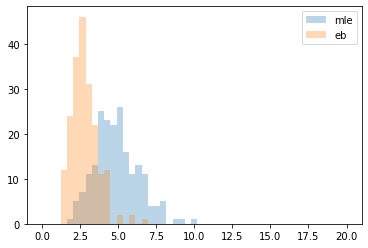

In [21]:
bins = np.linspace(0, 20, 50)
plt.hist(risk_mle, bins, alpha=0.3, label='mle')
plt.hist(risk_eb, bins, alpha=0.3, label='eb')
plt.legend(loc='upper right')
plt.show()

4e. Repeated analysis from 4d except with lambda sampled from a uniform distribution 

In [22]:
risk_mle, risk_eb = [], []
for i in range(num_runs):
    lam = np.random.uniform(low=0, high=8, size=num_trials)
    x = np.random.poisson(lam=lam)

    lam_mle = np.array(x)
    lam_eb = empirical_bayes(np.array(x))

    risk_mle_i = (1/num_trials)*sum((lam_mle - lam)**2)
    risk_eb_i = (1/num_trials)*sum((lam_eb - lam)**2)

    risk_mle.append(risk_mle_i)
    risk_eb.append(risk_eb_i)

mse_mle = np.mean(np.array(risk_mle))
mse_eb = np.mean(np.array(risk_eb))
print('MSE of maximum likelihood estimator: {}'.format(mse_mle))
print('MSE of empirical bayes estimator: {}'.format(mse_eb))

MSE of maximum likelihood estimator: 4.000836653195869
MSE of empirical bayes estimator: 2.510351507183434


Again, as hoped, our empirical bayes estimator outperforms our maximum likelihood estimator ($MSE_{mle} \ge MSE_{eb}$)! This is interesting since we derived the empirical bayes estimator using a different distribution ot the one actually used to generate the data. In effect, our bayes estimator has picked the best gamma distribution it can find to replicate a uniform[0,8] data generating process.

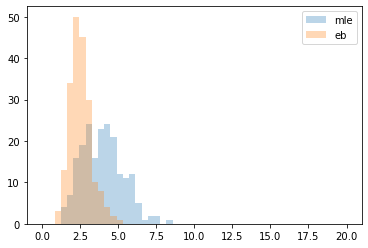

In [23]:
bins = np.linspace(0, 20, 50)
plt.hist(risk_mle, bins, alpha=0.3, label='mle')
plt.hist(risk_eb, bins, alpha=0.3, label='eb')
plt.legend(loc='upper right')
plt.show()